In [1]:
#Install necessary libraries
!pip install tensorflow numpy matplotlib seaborn scikit-learn

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns

In [3]:
# Load and preprocess CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
# Define classes that can fly and cannot fly
can_fly = [0, 2]  # airplane and bird
cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]  # all other classes

In [5]:
# Convert labels to binary
train_labels = np.where(np.isin(train_labels, can_fly), 1, 0)
test_labels = np.where(np.isin(test_labels, can_fly), 1, 0)

In [6]:
# Normalize images
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 69s 43ms/step - loss: 0.4088 - accuracy: 0.8304 - val_loss: 0.3482 - val_accuracy: 0.8553
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.3352 - accuracy: 0.8632 - val_loss: 0.3342 - val_accuracy: 0.8587
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.3009 - accuracy: 0.8779 - val_loss: 0.3177 - val_accuracy: 0.8688
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.2745 - accuracy: 0.8900 - val_loss: 0.2782 - val_accuracy: 0.8877
Epoch 5/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.2551 - accuracy: 0.8972 - val_loss: 0.2744 - val_accuracy: 0.8903
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.2361 - accuracy: 0.9054 - val_loss: 0.2844 - val_accuracy: 0.8862
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.2191 - accuracy: 0.9125 - val_loss: 0.2853 -

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.2960 - accuracy: 0.8891 - 3s/epoch - 11ms/step


In [11]:
# Predict on the test set
y_pred = (model.predict(test_images) > 0.5).astype("int32")

313/313 [==============================] - 4s 11ms/step


In [12]:
# Calculate evaluation metrics
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)
accuracy = accuracy_score(test_labels, y_pred)

In [18]:
# Print evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

#Precision: Measures the proportion of true positive predictions among all positive predictions. Higher precision indicates fewer false positives.
#Recall: Measures the proportion of true positives detected among all actual positives. Higher recall indicates fewer false negatives.
#F1 Score: Harmonic mean of precision and recall. It balances the two metrics and is useful when classes are imbalanced.
#Accuracy: Proportion of correctly predicted instances out of the total instances. It gives an overall measure of model performance.

Precision: 0.7406807131280388
Recall: 0.6855
F1 Score: 0.7120228512074785
Accuracy: 0.8891


In [14]:
# Confusion matrix
cm = confusion_matrix(test_labels, y_pred)

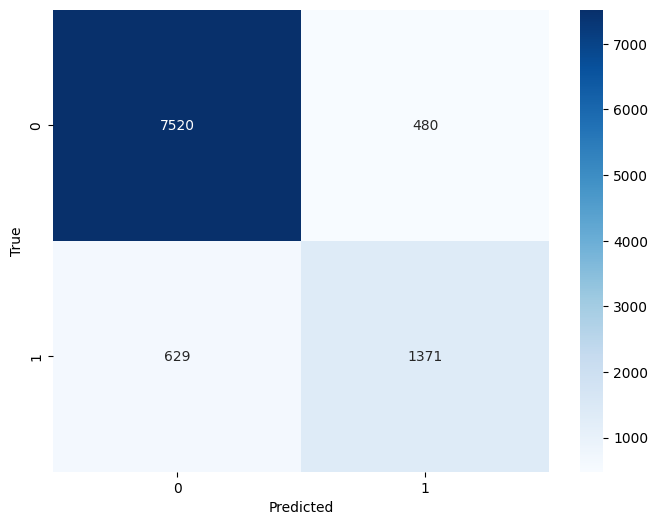

In [20]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# The confusion matrix shows the number of correct and incorrect predictions
# broken down by each class. It helps visualize the performance of the
# classification model, identifying where the model is getting confused. %% Plot
# training history

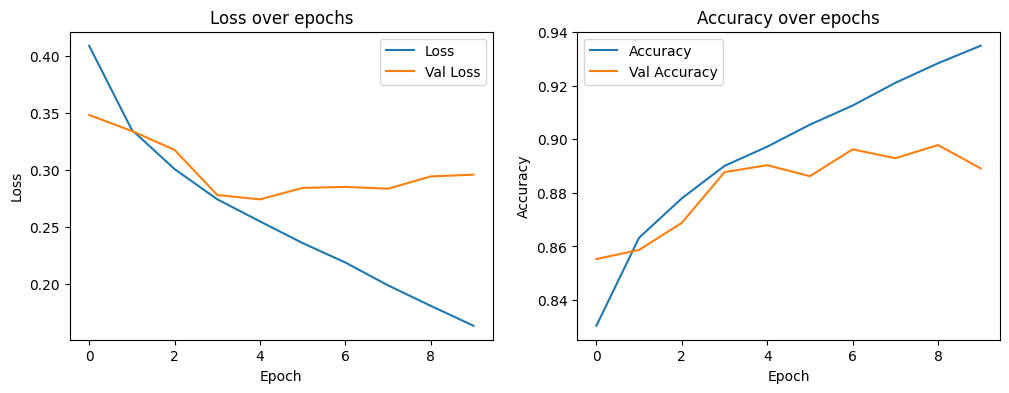

In [16]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()